In [188]:
import requests

from PIL import Image
from IPython.display import display
from io import BytesIO


In [2]:
uriprot_id = "p08183"
pdb_id="4R3C"

In [3]:
#rcsb database 
ress=requests.get(f"https://files.rcsb.org/download/{pdb_id}.pdb",pdb_id)
with open(f"{pdb_id}.pdb",'wb') as file :
    file.write(ress.content)

In [4]:
# AlphaFold2 Database
response = requests.get("https://alphafold.ebi.ac.uk/api/prediction/"+uriprot_id)
data = response.json()[0]

In [5]:
headers={"Accept": "application/json", "Content-Type": "application/json"} 
ress=requests.get("https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=10&organism=homo", headers=headers)

In [6]:
ress2=requests.get("https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=10&protein=p08183", headers=headers)

In [7]:
data_uniprot = ress2.json()

In [8]:
for i in data_uniprot:
    print(i)

{'accession': 'U4LL60', 'id': 'U4LL60_PYROM', 'proteinExistence': 'Inferred from homology', 'info': {'type': 'TrEMBL', 'created': '2013-12-11', 'modified': '2024-03-27', 'version': 58}, 'organism': {'taxonomy': 1076935, 'names': [{'type': 'scientific', 'value': 'Pyronema omphalodes (strain CBS 100304)'}, {'type': 'common', 'value': 'Pyronema confluens'}], 'lineage': ['Eukaryota', 'Fungi', 'Dikarya', 'Ascomycota', 'Pezizomycotina', 'Pezizomycetes', 'Pezizales', 'Pyronemataceae', 'Pyronema']}, 'protein': {'submittedName': [{'fullName': {'value': 'Similar to Multidrug resistance protein 1 acc. no. P08183', 'evidences': [{'code': 'ECO:0000313', 'source': {'name': 'EMBL', 'id': 'CCX13655.1', 'url': 'https://www.ebi.ac.uk/ena/browser/view/CCX13655.1'}}]}}]}, 'gene': [{'orfNames': [{'value': 'PCON_13248', 'evidences': [{'code': 'ECO:0000313', 'source': {'name': 'EMBL', 'id': 'CCX13655.1', 'url': 'https://www.ebi.ac.uk/ena/browser/view/CCX13655.1'}}]}]}], 'comments': [{'type': 'SUBCELLULAR_LOC

In [9]:
params_uniprot = ['id', 'text', 'url', ' ligand']

In [10]:
heads={"Accept": "application/json",
"Accept-Encoding": "gzip, deflate, br, zstd",
"Accept-Language":"en-US,en;q=0.9",
"Connection":"keep-alive",
"Content-Type": "application/json",
"Host": "www.ebi.ac.uk"
}

In [11]:
resp=requests.get("https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=10&protein=insulin", headers=heads)
uniprot_data = resp.json()
# uniprot_data

In [23]:
def extract_uniprot_ids(pdb_file_path):
    uniprot_ids = []

    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("REMARK 800 SITE_DESCRIPTION: BINDING SITE FOR RESIDUE"):
                # Example DBREF line format:
                # DBREF   1  A  100  120  1  P12345  1  20  100  120  1
                parts = line.split()
                # UniProt ID is usually the 7th element in the DBREF line
                uniprot_id = parts[7:]
                if uniprot_id:
                    uniprot_ids.append(uniprot_id)
    
    return uniprot_ids


# Example usage
pdb_file_path = '4R3C.pdb'  # Replace with your PDB file path
uniprot_ids = extract_uniprot_ids(pdb_file_path)
print("UniProt IDs found:", uniprot_ids)


UniProt IDs found: [['GG5', 'A', '401'], ['3GF', 'A', '402'], ['3GF', 'A', '403'], ['CL', 'A', '404']]


In [24]:
ligand_list=[]
for i in uniprot_ids:
    ligand = "_".join(i)
    ligand_list.append(ligand)
ligand_list

['GG5_A_401', '3GF_A_402', '3GF_A_403', 'CL_A_404']

In [16]:
# LINK         NE2 HIS A  87                FE   HEM A 142     1555   1555  2.14  
# LINK         NE2 HIS B  92                FE   HEM B 148     1555   1555  2.22  
# LINK         NE2 HIS C  87                FE   HEM C 142     1555   1555  2.26  
# LINK         NE2 HIS D  92                FE   HEM D 148     1555   1555  1.98  


In [26]:
def extract_uniprot_ids(pdb_file_path):
    uniprot_ids = []

    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("HETATM"):
                # Example DBREF line format:
                # DBREF   1  A  100  120  1  P12345  1  20  100  120  1
                parts = line.split()
                # UniProt ID is usually the 7th element in the DBREF line
                uniprot_id = parts
                if uniprot_id:
                    uniprot_ids.append(uniprot_id)
    
    return uniprot_ids


# Example usage
pdb_file_path = '4hhb.pdb'  # Replace with your PDB file path
uniprot_ids = extract_uniprot_ids(pdb_file_path)
print("UniProt IDs found:", uniprot_ids)


UniProt IDs found: []


In [25]:
# SITE_DESCRIPTION: BINDING SITE FOR RESIDUE 4H3C 
# SITE_DESCRIPTION: BINDING SITE FOR RESIDUE 2H8H
# SITE_DESCRIPTION: BINDING SITE FOR RESIDUE 6SMB



In [28]:
import time 
def run_protoss(pdb_id):
    url = 'https://proteins.plus/api/protoss_rest'
    payload = {"protoss": {"pdbCode": pdb_id}}
    headers={"Accept": "application/json", "Content-Type": "application/json"}
    response = requests.post(url, json=payload, headers=headers, timeout=30)
    response.raise_for_status()
    time.sleep(5)        
    if response.status_code==200:
        loc=response.json()['location']
        job_response = requests.get(loc)
        return job_response.json()
    else:
        return 'Unknown Server Error'


In [41]:
def protos():
    processed_data = run_protoss(pdb_id)
    protein = processed_data['protein']
    ligands = processed_data['ligands']
    log = processed_data['log']

    return protein, ligands, log 


In [42]:
protos()

('https://proteins.plus/results/protoss/ZLq2PLA7ub6KwDtsjiay7gVo/4r3c.pdb',
 'https://proteins.plus/results/protoss/ZLq2PLA7ub6KwDtsjiay7gVo/4r3c.sdf',
 'https://proteins.plus/results/protoss/ZLq2PLA7ub6KwDtsjiay7gVo/4r3c_log.txt')

In [74]:
url="https://swissdock.ch:8443/preplig"
ligand_smiles="CCO"
params={
    "mySMILES":ligand_smiles
}

In [204]:
#pose view 
headers={"Accept": "application/json", "Content-Type": "application/json"} 
params = {
            "poseview": {
            "pdbCode":"4R3C",
            "ligand":"GG5_A_401"}
            }
     
response = requests.post("https://proteins.plus/api/poseview_rest",headers=headers,json=params)
location = response.json()['location']
visuals = requests.get(location).json()
img=requests.get(visuals['result_png_picture'])
visuals

{'status_code': 200,
 'result_png_picture': 'https://proteins.plus/results/poseview/z8gH6VebAwKDN13zyrjq4pa3/4r3c_GG5_A_401.png',
 'result_pdf_picture': 'https://proteins.plus/results/poseview/z8gH6VebAwKDN13zyrjq4pa3/4r3c_GG5_A_401.pdf',
 'result_svg_picture': 'https://proteins.plus/results/poseview/z8gH6VebAwKDN13zyrjq4pa3/4r3c_GG5_A_401.svg'}

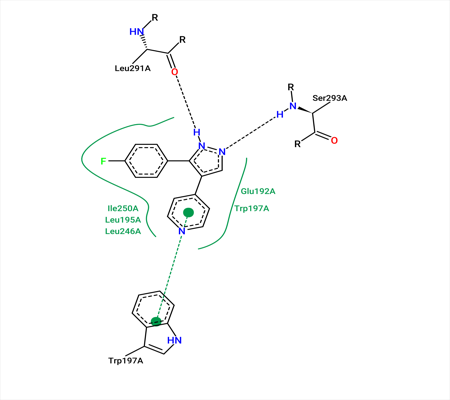

In [205]:
image = Image.open(BytesIO(img.content))
# (width, height)
new_size = (450, 400)  
img_resized = image.resize(new_size)
display(img_resized)


<Response [404]>